- title: Metabolic Modelling: The story of Artemisinin
- author: Miroslav Gasparek
- date: 2019-11-18
- category: blog
- tags: metabolicengineering, syntheticbiology, optimization
- summary: How metabolic modelling can help us optimize the production of antimalarial drug Artemisinin using the flux balance analysis and convex optimization.

*Note: The following project is based on the Problem 9.3, Chapter 9 ("Metabolism") of the fantastic textbook "Fundamentals of Systems Biology" by Markus W. Covert. If you want to learn more about systems biology and modelling of the biological systems, definitely read that book!*

<figure>
    <img src="/images/artemisia_annua.jpg" style="width: 600px;"/>
    <font size="6">
    <figcaption>Artemisia annua, from which Artemisinin was originally extracted.</figcaption>
    </font>
</figure>

 Synthetic Biology has numerous practical applications, which is one of the reasons why I like it so much - it is a truly versatile engineering discipline. From the engineered T-Cells that attack cancer cells to cruelty-free beauty products, synthetic biology can provide humanity with the effective solutions to the important problems.

In this blog, we will look at the specific subfield of synthetic biology called **metabolic engineering**. This subfield of synthetic biology focuses on the optimization of the cellular regulatory processes with aim to maximize the production of the certain cellular substances. As you can imagine, such optimization has significant applications in the pharmaceuticals' manufacturing, bioproduction, and environmental regulation. 

We will try to predict the yield of the substance called *artemisinin* from the farnesyl pyrophosphate pathway that produces the artemisinic acid. You might ask: "Why, for the pili of E. coli, would I want to do this? And who cares?" 

## Why Artemisinin Matters

Artemisinin is an **antimalarial drug** that represents the standard treatment for the malaria disease. This drug was intially extracted from the plant *Artemisia annua*, sweet wormwood, which was used in the Chinese traditional medicine. Actually, Tu Youyou, a Chinese scientist that discovered this drug was awarded a half of the 2015 Nobel Prize in Medicine for its discovery!

As you can imagine, the manufacturing from the exotic plant is not very efficient, and is rather expensive. Therefore, Jay Keasling and his lab at the University of California at Berkeley decided to use genetically modify the yeasts that could manufacture the artemisinin much more effectively. They actually succeeded in this and founded the company Amyris in 2003, which went public in October 2010 [2].

Through introduction of an amorphadiene synthase and a novel cytochrome P450 (CYP71), the team engineered the yeast's native farnesyl pyrophosphate pathway to produce the intermediates that could be converted into artemisinic acid, a precursor of the artemisinin [1].

## What Can Metabolic Engineering Do For Us? 

In general, metabolic engineers aim to analyze the **metabolic pathways**, which are the sets of successive chemical reactions that lead to the production of a certain molecule. When analysing the metabolic pathways, we can look at two phenomena.

First, we can take the naturally occuring metabolic pathway and try to find out how much desired **output molecule**,in our case artemisinin, can be produced from the given **inputs**, which are, in our case, glucose, CO2, H2O, ATP, and ADP, the typical "cellular fuel". This is an essential information for us, if we want to, for example, scale our lab bench-scale experiment to the industrial-scale level.

Second, after we analyze the naturally occuring metabolic pathway, we can try to remove/add some of its elements and look at how the yield of the desired product changes. In this way, we can *optimize* the output and therefore achieve the maximum efficiency in the production.

## Artemisinin Synthesis Metabolic Pathway

We will use a metabolic engineering technique called **flux-balance analysis** [3] and **convex optimisation methods** to find out how much **artemisinin** can be produced from the given amount of inputs. After that, we will try to find out how much artemisinin maximize the production of the artemisinin by manipulating the genes in the artemisinic acid synthesis pathway.

To do this, we need to look at the metabolic pathway that leads to the production of artemisinin. The scheme of target pathway (farnesyl pyrophosphate pathway) to produce the artemisinic acid is displayed below (image taken from [1]). 

<figure>
    <img src="/images/FPP_pathway.jpg" style="width: 600px;"/>
    <font size="6">
    <figcaption>Scheme of the farnesyl pyrophosphate pathway to produce the artemisinic acid.</figcaption>
    </font>
</figure>

We can see a bunch of arrows and chemical species. How does it work? The arrows point from *reactants* (e. g. glucose) to *products* (e. g. 2 acetyl-CoA), while the descriptions along the arrows designate either the bunch of reactions lumped together (e. g. glycolysis) or *enzymes* that catalyze ("speed up") the reactions (e. g. MPP).

We can see that the pathway includes the following 16 species: 

glucose, acetyl-CoA, CoA, acetoacetyl-CoA, ATP, ADP, mevalonate-PP, CO2, IPP, DMAPP, FPP, squalene, amorphadiene, H2O, artemisinic acid, artemisinin

## Reaction Rate Equations

Now when we have the metabolic pathway, we have to quantitatively describe the chemical reactions between the reactants, products, and enzymes in the pathway. Going into details of this process is above the scope of this blog, but I will definitely write about it in some future blogs. If you want to learn more about modelling of the biomolecular systems, check [Mathematical Modelling in Systems Biology: An Introduction](https://www.math.uwaterloo.ca/~bingalls/MMSB/Notes.pdf) by Brian Ingalls which also includes a good chapter on metabolic modelling, or my favorite [Biomolecular Feedback Systems](http://www.cds.caltech.edu/~murray/BFSwiki/index.php?title=Main_Page) by Richard Murray and Domitilla del Vecchio.



In essence, we will describe the changes in the concentrations of the chemical species in the metabolic pathway by the set of the ordinary differential equations (ODEs). The change in the amount of each of the species is equal to the *fluxes* that arise when one chemical species is converted into another. In this context, the flux is the rate of turnover of the molecules through a metabolic pathway. 

For a metabolite $m$ with concentration $[m]$, we can write the reaction conceptually as

\begin{align}
    \frac{d[m}{dt} = \sum{v_{production}} - \sum{v_{loss}}
\end{align}

where $v_{production}$ are the fluxes that contribute to the increase of amount of the species $M$ and $v_{loss}$ are the fluxes that correspond to the decrease of amount of the given species.

Consequently, to each of the 16 species in the diagram, we can assign a corresponding flux according to the pathway diagram. where $v_{i}$ is the flux associated with the $i$-th reaction. Note, that we do not need to consider the reversibility of the reactions, as this is accounted for in the constraints that we will introduce later.

\begin{align}
\frac{d}{dt}[glucose] &= - v_{1} \\
\frac{d}{dt}[acetyl-CoA] &=  + 2 v_{1} - 2 v_{2} \\
\frac{d}{dt}[CoA] &= + v_{2} \\
\frac{d}{dt}[acetoacetyl-CoA] &= + v_{2} - v_{3} \\
\frac{d}{dt}[ATP] &= - 2 v_{3} \\
\frac{d}{dt}[ADP] &= + 2 v_{3} \\
\frac{d}{dt}[mevalonate-PP] &= + v_{3} - v_{4} \\
\frac{d}{dt}[CO_{2}] &= + v_{4} \\
\frac{d}{dt}[IPP] &= + v_{4} - v_{5} - v_{6} \\
\frac{d}{dt}[DMAPP] &= + v_{5} - v_{6} \\
\frac{d}{dt}[FPP] &=  + v_{6} - v_{7} - v_{9} \\
\frac{d}{dt}[squalene] &=  + v_{7} - v_{8} \\
\frac{d}{dt}[sterols] &= + v_{8} \\
\frac{d}{dt}[amorphadiene] &= + v_{9} - v_{10} \\
\frac{d}{dt}[H_{2}O] &= - 2 v_{10} \\
\frac{d}{dt}[artemisinic \ acid] &= + v_{10} - v_{11} \\
\frac{d}{dt}[artemisinin] &= + v_{11} \\
\end{align}


This is quite a number of differential equations and reactions! Let's now write down the reactions in a compact form. If we denote the vector of all species' concentration as $[M]$ and the vector of the reaction rates as $v$, the reaction rate equations can be written as

\begin{align}
\frac{d}{dt}[M] = Sv
\end{align}

where $S$ is a stoichiometric matrix. In our case, we have:

\begin{align}
    \frac{d}{dt}\begin{bmatrix}
        [glucose] \\
        [acetyl-CoA] \\
        [CoA] \\
        [acetoacetyl-CoA] \\
        [ATP] \\
        [ADP] \\
        [mevalonate] \\
        [CO_{2}] \\
        [IPP] \\
        [DMAPP] \\
        [FPP] \\
        [squalene] \\
        [sterols] \\
        [amorphadiene] \\
        [H_{2}O] \\
        [artemisinic \ acid] \\
        [artemisinin] \\
\end{bmatrix} &=
    \begin{bmatrix}
    -1 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    2  & -2 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 1  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 1  & -1 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & -2 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & 2  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & 1  & -1 & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & 0  & 1  & 0  & 0  & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & 0  & 1  & -1 & -1 & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & 0  & 0  & 1  & -1 & 0  & 0  & 0  & 0  & 0  \\
    0  & 0  & 0  & 0  & 0  & 1  & -1 & 0  & -1 & 0  & 0  \\
    0  & 0  & 0  & 0  & 0  & 0  & 1  & -1 & 0  & 0  & 0  \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & 0  & 0  & 0  \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & -1 & 0  \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & -2 & 0  \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & -1 \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1 
    \end{bmatrix}
    \begin{bmatrix}
        v_{1} \\
        v_{2} \\
        v_{3} \\
        v_{4} \\
        v_{5} \\
        v_{6} \\
        v_{7} \\
        v_{8} \\
        v_{9} \\
        v_{10} \\
        v_{11} \\
    \end{bmatrix}
\end{align}

## Exchange Fluxes
We will now have to include the exchange fluxes. So far, we have only considered the chemical interactions between the elements of the pathway, inside the cell. However, to drive the chemical reactions, we need to supply the nutrients such as glucose, and energy substrates, such as ATP. These nutrients come from the extracellular environment, and we account for them through the exchange fluxes. 

We will include the exchange fluxes for the following nutrients:
* Input: glucose
* Outputs: artemisinin, sterols
* cofactors: CO2, H2O, CoA, ATP, ADP

We will assume that the rest of the intermediary metabolites and other species are not exchanged with the environment.

This means that we will have to amend our reactions rate equations as follows:

\begin{align}
\frac{d}{dt}[glucose] &= - v_{1} + b_{glucose} \\
\frac{d}{dt}[acetyl-CoA] &=  + 2 v_{1} - 2 v_{2} \\
\frac{d}{dt}[CoA] &= + v_{2} + b_{CoA} \\
\frac{d}{dt}[acetoacetyl-CoA] &= v_{2} - v_{3} \\
\frac{d}{dt}[ATP] &= - 2 v_{3} + b_{ATP} \\
\frac{d}{dt}[ADP] &= + 2 v_{3} + b_{ADP} \\
\frac{d}{dt}[mevalonate-PP] &= + v_{3} - v_{4} \\
\frac{d}{dt}[CO_{2}] &= + v_{4} + b_{CO2} \\
\frac{d}{dt}[IPP] &= + v_{4} - v_{5} - v_{6} \\
\frac{d}{dt}[DMAPP] &= + v_{5} - v_{6} \\
\frac{d}{dt}[FPP] &=  + v_{6} - v_{7} - v_{9} \\
\frac{d}{dt}[squalene] &=  + v_{7} - v_{8} \\
\frac{d}{dt}[sterols] &= + v_{8} + b_{sterols} \\
\frac{d}{dt}[amorphadiene] &= + v_{9} - v_{10} \\
\frac{d}{dt}[H_{2}O] &= - 2 v_{10} + b_{H2O} \\
\frac{d}{dt}[artemisinic \ acid] &= + v_{10} - v_{11} \\
\frac{d}{dt}[artemisinin] &= + v_{11} + b_{artemisinin} \\
\end{align}

If we denote the new stoichiometric matrix with the flux included as $S_{b}$ and the vector of rates with the species as $v_{b}$, then we have the following relationship:

\begin{align}
    \frac{d}{dt}\begin{bmatrix}
        [glucose] \\
        [acetyl-CoA] \\
        [CoA] \\
        [acetoacetyl-CoA] \\
        [ATP] \\
        [ADP] \\
        [mevalonate] \\
        [CO_{2}] \\
        [IPP] \\
        [DMAPP] \\
        [FPP] \\
        [squalene] \\
        [sterols] \\
        [amorphadiene] \\
        [H_{2}O] \\
        [artemisinic \ acid] \\
        [artemisinin] \\
\end{bmatrix} &=
    \begin{bmatrix}
    -1 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    2  & -2 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 1  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 1  & -1 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & -2 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 2  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0  & 0  & 1  & -1 & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 1  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    0  & 0  & 0  & 1  & -1 & -1 & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 0  & 1  & -1 & 0  & 0  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 0  & 0  & 1  & -1 & 0  & -1 & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 0  & 0  & 0  & 1  & -1 & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & 0  & 0  & 0  & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & -1 & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & -2 & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 0  & 1  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        v_{1} \\
        v_{2} \\
        v_{3} \\
        v_{4} \\
        v_{5} \\
        v_{6} \\
        v_{7} \\
        v_{8} \\
        v_{9} \\
        v_{10} \\
        v_{11} \\
        b_{glucose} \\
        b_{CoA} \\
        b_{ATP} \\
        b_{ADP} \\
        b_{CO2} \\
        b_{sterols} \\
        b_{H2O} \\
        b_{artemisinin}
    \end{bmatrix}
\end{align}

This can be written in a compact form simply as
\begin{align}
\frac{d}{dt}[M] = S_{b}v_{b}
\end{align}

We will store this monstruous matrix in an Excel sheet for the later use in code. This sheet can be found in the [GitHub repository](https://github.com/miroslavgasparek/MetabolicModelling) for this project. 

## Flux Balance Analysis

To find out the time evolution of concentration of each of the substances, we would need to solve the system of 19 (1) differential equations! And we do not even know the initial conditions. Even cleaning dirty test tubes sounds more appealing than this, right? 

To simplify this seemingly hopeless situation, we will assume that the system is in the steady state and in the equilibrium. This means that the concentrations of the chemical species are constant and the rate of their change is equal to zero.

Does it make senes? Well, it depends on the timescale that we are looking at. If we are producing larger amounts of artemisinin, we are probably looking at the timescale of hours. The processes within the metabolic pathways happen at the timescale of seconds. Therefore, it is completely fine to assume that the system is in equilibrium. This means that $\frac{d}{dt}[M] = S_{b}v_{b} = 0$.

Furthermore, we assume that the observed flux of artemisinin is maximized. Why would this be the case? Well, in the cell culture, many mutations occur. Some of these mutations could enable the cell to grow a bit faster and hence produce more proteins, including artemisinin. This gives these cels evolutionary advantage, as they can divide faster and over the time, they will gradually dominate the colony. In the end, we can say that the cellular population will, after some time, naturally mutate towards the maximum production rate of artemisinin.

## Calculating the maximum artemisinin production
Now we will assume that we import the glucose into the system at a rate of **5 mmol/g/DCW/h**. This means that we supply 5 mmol of glucose per gram of dry cellular weight per hour. This is an unit typically used in metabolic engineering, as the cells contain significant proportion on water and we actually want to supply reactants in proportion to the cellular weight that includes the proteins, nucleotides, etc. 

Now we will assume that our aim is to maximize the artemisinin production, i. e., we want to **maximize $-b_{artemisinin}$**, which represents the amount of artemisinin leaving the system. This kind of problem is called *optimization problem*, which has the general form of: 

\begin{align}
\text{min} \ f(x) \\
\text{subject to} \\
h(x) = 0
g(x) < 0
\end{align}

This means that we want to find the value of $x$ that minimizes (or maximizes) the value of function $f(x)$ subject to certain equality constraints $h(x)$and inequality constraints $g(x) < 0$.

Therefore, we can write this optimization problem as follows: 

\begin{align}
\text{maximize} \ (-b_{artemisinin}) \\
\text{subject to} \\
\ S_{b}v_{b} &= 0 \\
0 \leq v_{1} &\leq +\infty \\
0 \leq v_{3} &\leq +\infty \\
0 \leq v_{4} &\leq +\infty \\
0 \leq v_{6} &\leq +\infty \\
0 \leq v_{7} &\leq +\infty \\
0 \leq v_{8} &\leq +\infty \\
0 \leq v_{9} &\leq +\infty \\
0 \leq v_{10} &\leq +\infty \\
0 \leq v_{11} &\leq +\infty \\
0 \leq b_{glucose} &\leq 5
\end{align}

The equality constraint $S_{b}v_{b} = 0 $ represents that system has to obey steady-state form of the dynamic equations of the system. Inequlity constraints come from the fact that we only have a limited amount of glucose and that the irreversible reaction can proceed only in one direction and hence they have to be either positive or negative positive/negative.

## Solving the Optimization Problem Using CVXPY

Cool! It seems like we have all that we need to solve this optimization problem. We will solve it using [CVXPY](https://www.cvxpy.org/#) Python module developed by Prof. Stephen Boyd (and others!) from Stanford, whose lectures on Convex Optimization I strongly recommend if you want to learn more about this widely used method.

We will now set up this optimization problem in CVXPY. Our variable of interest is `b_artemisinin`, which represents the flux of the artemisinin out of the system for the corresponding flux of glucose (5 mmol/g/DCW/h).

We start by importing the appropriate modules.


In [5]:
# Import the appropriate Python modules
# Numerical & data modules
import numpy as np
import pandas as pd

# Convex optimisation module
import cvxpy as cvx

import os
import re

# Import Matplotlib
import matplotlib.pyplot as plt

# Import function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline


We now load the Stoichiometric maxtrix data.

In [6]:
# Load the matrix from Excel
e_sheet = pd.read_excel("stoi_mat_no_rev.xlsx")

# Remove the first column
e_sheet = e_sheet.drop('Species/Rates',1)

# Save it as the NumPy array
S_b = e_sheet.values

# Save as matrix of floats
S_b = S_b.astype(float)

# Get the shape of stoichiometry matrix
rows, cols = S_b.shape

Now, we can finally have a go on solving of the optimization problem. 

In [7]:
### Maximize the artemisinin production

# Define array of zeros for the RHS of the equality constraint
zero_vals = np.zeros((rows,1))

### Construct the problem

# Define the lower bounds and intialize them all to -infinity
lower_bounds = np.ones((cols,1))*(-(float('inf')))

# Now add the lower bounds to specific reactions, i. e. for the irreversible rates
lower_bounds[0] = 0 # v1
# lower_bounds[1] = 0 # v2
lower_bounds[2] = 0 # v3
lower_bounds[3] = 0 # v4
# lower_bounds[4] = 0 # v5
lower_bounds[5] = 0 # v6
lower_bounds[6] = 0 # v7
lower_bounds[7] = 0 # v8
lower_bounds[8] = 0 # v9
lower_bounds[9] = 0 # v10
lower_bounds[10] = 0 # v11
lower_bounds[11] = 0 # bglucose

# Define the upper bounds and intialize them all to infinity
upper_bounds = np.ones((cols,1))*((float('inf')))
upper_bounds[11] = 5 # bglucose

# Define the exchange fluxes vector
v_b = cvx.Variable((cols,1))

# Define the exchange flux of artemisinin
b_artemisinin = v_b[18]

# Define the objective function
# The maximization is equivalent to minimization of the variable
# with the opposite sign
objective = cvx.Minimize(b_artemisinin)

# Define the constraints
constraints = [S_b*v_b == zero_vals,
               lower_bounds <= v_b,
               v_b <= upper_bounds]

# Definition of the optimization problem for CVXPY
prob = cvx.Problem(objective, constraints)

# Display the flux of artemisinin
print("Maximum artemisinin flux:", prob.solve(),"mmol/g/DCW/h")
print()

Maximum artemisinin flux: -2.5 mmol/g/DCW/h



As we can see, **the flux of artemisinin out of the system (i. e. its production rate) is 2.5 mmol/g/DCW/h**. In this way, we could determine what amount of artemisinin we can produce from 5.0 mmol/g/DCW/h in the optimal conditions!

For completeness, we can actually look at the fluxes of all the other chemical species in the pathway.

In [8]:
# Print the rates for each of the species
species_fluxes_list = ['v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 
                       'b_Glucose', 'b_CoA', 'b_ATP', 'b_ADP', 'b_CO2', 'b_sterols', 'b_H2O', 'b_artemisinin']

for sp, ind in zip(species_fluxes_list, range(len(v_b.value))):
    print(sp,': ', v_b.value[ind])
    

v_1 :  [5.]
v_2 :  [5.]
v_3 :  [5.]
v_4 :  [5.]
v_5 :  [2.5]
v_6 :  [2.5]
v_7 :  [1.21048926e-21]
v_8 :  [6.36750243e-22]
v_9 :  [2.5]
v_10 :  [2.5]
v_11 :  [2.5]
b_Glucose :  [5.]
b_CoA :  [-5.]
b_ATP :  [10.]
b_ADP :  [-10.]
b_CO2 :  [-5.]
b_sterols :  [-6.44249297e-22]
b_H2O :  [5.]
b_artemisinin :  [-2.5]


How much we can learn with so little input information! All we need to do is to let the homeostasis do its magic. 

It is interesting to see that the rates $v_{7}$ and $v_{8}$ are essentially set to zero. This means that in the optimal state, the squalene and sterol pathway is essentially out and is not used!

## Optimisation of the artemisinin production through gene knockout
The structure of the metabolic pathway might not be optimal and we can use the flux balance analysis to investigate the effect of the knock out of the individual genes. These genes produce the particular enzymes and therefore we can examine the effect of removal of each of the enzymes on the production of the artemisinin. 

How can we do this in the lab? We could knock-out the given gene using, for example, homologous recombination or CRISPR/Cas9 system.

How can we do this computationally? To knock out the gene X, we add the constraints in the form of $0 \leq v_{geneX} \leq 0$. This essentially mean, that we set the flux through the given chemical species to zero. We can do this through a simple `for` loop for all the enzyme-producing genes in this pathway:

In [16]:
# Get the list of the pathways 
pathway_list = ['glycolysis','ERG10','MPP','ERG19','IDI1','ERG20','ERG9','sterol syn.',
                'APD synth.','CYP71','art. syn.']

# Empty list of the optimized artemisinin fluxes for the given pathway knockout
art_list = []

### Construct the problem ###
## Loop over all the genes and always set the lower and upper bounds to zero
for ind in range(len(pathway_list)):

    # Define the lower bounds and intialize them all to infinit
    lower_bounds = np.ones((cols,1))*(-(float('inf')))

    # Define the upper bounds and intialize them all to infinity
    upper_bounds = np.ones((cols,1))*((float('inf')))
    
    # Now add the lower bounds to specific reactions, i. e. for the irreversible rates
    lower_bounds[0] = 0 # v1
    lower_bounds[2] = 0 # v3
    lower_bounds[3] = 0 # v4
    lower_bounds[5] = 0 # v6
    lower_bounds[6] = 0 # v7
    lower_bounds[7] = 0 # v8
    lower_bounds[8] = 0 # v9
    lower_bounds[9] = 0 # v10
    lower_bounds[10] = 0 # v11
    lower_bounds[11] = 0 # bglucose
    
    # Add the upper bound to the glucose
    upper_bounds[11] = 5 # bglucose

    # Set the bounds for the specific rates to 0
    lower_bounds[ind] = 0
    upper_bounds[ind] = 0
    
    # Define array of zeros for the RHS of the equality constraint
    zero_vals = np.zeros((rows,1))
    
    # Define the exchange fluxes vector
    v_b = cvx.Variable((cols,1))

    # Define the exchange flux of artemisinin
    b_artemisinin = v_b[18]

    # Define the objective function
    objective = cvx.Minimize(b_artemisinin)

    # Define the constraints
    constraints = [S_b*v_b == zero_vals,
                   lower_bounds <= v_b,
                   v_b <= upper_bounds]

    # Definition the problem for CVXPY
    prob = cvx.Problem(objective, constraints)

    # Display the flux of artemisinin
    print(pathway_list[ind],'pathway element knocked out')
    print("Maximum artemisinin flux:", prob.solve())
    print()
    
    # Store the flux of artemisinin
    art_list.append(prob.solve())

glycolysis pathway element knocked out
Maximum artemisinin flux: 1.0805171696610265e-09

ERG10 pathway element knocked out
Maximum artemisinin flux: 1.5747543147291606e-11

MPP pathway element knocked out
Maximum artemisinin flux: 1.076191028644333e-09

ERG19 pathway element knocked out
Maximum artemisinin flux: -2.7739793176235625e-09

IDI1 pathway element knocked out
Maximum artemisinin flux: -7.5493322075659e-09

ERG20 pathway element knocked out
Maximum artemisinin flux: -1.607751846523037e-08

ERG9 pathway element knocked out
Maximum artemisinin flux: -2.5000368239550745

sterol syn. pathway element knocked out
Maximum artemisinin flux: -2.5000366878073095

APD synth. pathway element knocked out
Maximum artemisinin flux: -2.050966945881564e-06

CYP71 pathway element knocked out
Maximum artemisinin flux: -1.835088407818733e-07

art. syn. pathway element knocked out
Maximum artemisinin flux: -2.00954986806559e-06



As we can see from the outputs of the program above and from the bar chart, knocking out of any of the elements of the pathway except of ERG9 enzyme (Squalene synthase) and sterol synthesis pathway, will essentially shut-off the production of artemisinin. On the other hand, **we can safely remove the ERG9 and sterol synthesis pathway enzmyes** without influencing the production of artemisinin.

This is important - if we remove the redundant genes from the system, we will free some cellular resources that wouold be otherwise devoted to the production of the corresponding enzymes. Therefore, this can definitely improve the efficiency of the manufacturing process, increase the yield and therefore increase the yields (and profits!).


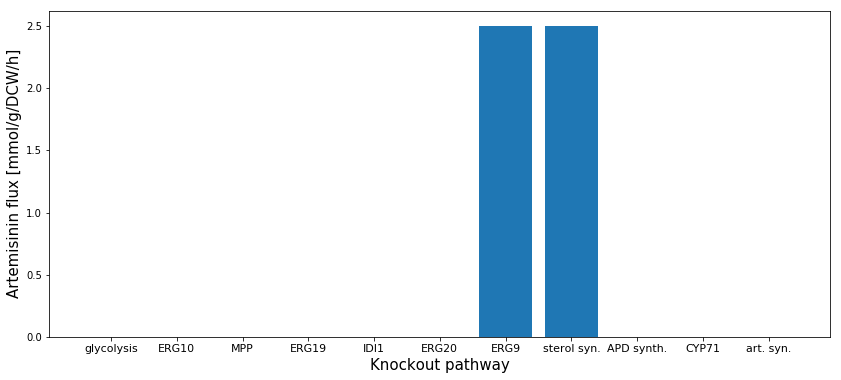

In [21]:
# Make a bar chart with the fluxes
x = np.arange(len(pathway_list))

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x, np.abs(np.array(art_list)))
ax.set_xticks(x)
ax.set_xticklabels(pathway_list, fontsize=11)
ax.set_xlabel('Knockout pathway',fontsize=15)
ax.set_ylabel('Artemisinin flux [mmol/g/DCW/h]',fontsize=15)
plt.show()


As we can see from the outputs of the program above and from the bar chart, knocking out of any of the elements of the pathway except of ERG9 enzyme (Squalene synthase) and sterol synthesis pathway, will essentially shut-off the production of artemisinin. On the other hand, **we can safely remove the ERG9 and sterol synthesis pathway enzmyes** without influencing the production of artemisinin.

This is important - if we remove the redundant genes from the system, we will free some cellular resources that wouold be otherwise devoted to the production of the corresponding enzymes. Therefore, this can definitely improve the efficiency of the manufacturing process, increase the yield and therefore increase the yields (and profits!). Of course, this is true only if the redundant genes in the given pathway are not actually essential in the other important cellular processes.

However, in general, cells carry a lot of redundant genes and if we place the cells into a nice, safe, and warm media, they will not need to utilzie many of their genes, which can be removed to increase the manufacturing efficiency of these little living factories. 

I hope that you enjoyed this introduction to the metabolic modelling. Of course, things are much more complex. For example. we could include the time dependence of the gene expression and consider the non-stationary processes... but we can do this next time!

As you can see, synthetic biology can have quite an important and positive influence on our life - who would not like to have cheaper and more accessible antimalarial drugs? Or painkillers? Or biofuels? Or... There are so many options! 

So if you are searching for an exciting field to delve into, SynBio is there for you! 

## References
[1] Covert, M. W. (2017). Fundamentals of systems biology: From synthetic circuits to whole-cell models (1st Editio). Boca Raton: Taylor & Francis. https://doi.org/10.4324/9781315222615

[2] Amyris IPO: Which VC backers are (and aren’t) in the black | Fortune. (2010). Retrieved November 17, 2019, from https://fortune.com/2010/09/29/amyris-ipo-which-vc-backers-are-and-arent-in-the-black/

[3] Orth, J. D., Thiele, I., & Palsson, B. O. (2010, March). What is flux balance analysis? *Nature Biotechnology*. https://doi.org/10.1038/nbt.1614